In [36]:
# Credits -
# https://www.analyticsindiamag.com/beginners-guide-to-k-means-clustering/
# Author - Amal Nair
    


In [2]:
# Importing basic packages

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# Loading dataset
col_names = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "class"]
iris_dataset = pd.read_csv("iris.csv", names = col_names, header = None)

In [11]:
iris_dataset.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Drop class column as we don't need to train our model
iris_dataset.drop(["class"], axis = 1, inplace = True)

In [13]:
iris_dataset.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# Select 2 random features for clustering
X = iris_dataset.iloc[:, [0, 2]].values

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [18]:
# Use Elbow Graph to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = [] # Within-Cluster-Sum-Of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    # kmeans.inertia_ returns wcss for given cluster
    wcss.append(kmeans.inertia_)

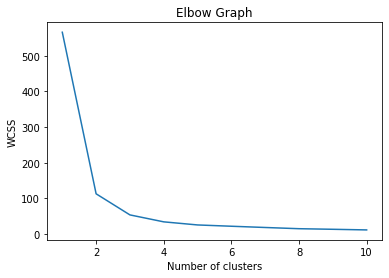

In [23]:
# Plotting values of WCSS - Elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Graph")

plt.show()

In [24]:
# From above graph, it can be seen the optimal value
# of number of clusters is 3

In [27]:
# Going with 3 cluster strategy ...
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)

In [26]:
y = kmeans.fit_predict(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


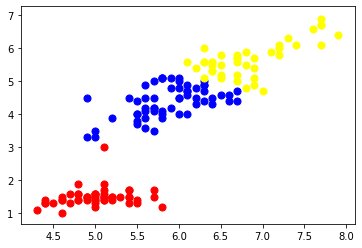

In [35]:
# Plotting scatter plots showing all clusters
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = "red", label = "Cluster 1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = "blue", label = "Cluster 2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = "yellow", label = "Cluster 3")

plt.show()